In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fitslist = 'spectrums.cut.txt'				# name list of fits files 

fitsimage = np.loadtxt(fitslist, dtype="str", usecols=(0,), unpack=True)

In [3]:
counter=range(len(fitsimage))
dat=[]
for element in counter:
    fits_image_hdul = fits.open('./fits/'+fitsimage[element])
# Esto lo hago para dejar un arreglo de tamaño 47 x 1909 (n_espectros x n_frecuencias)
    dat += [fits_image_hdul[0].data[:1909].tolist()]
dat=np.array(dat)
print(dat.shape)
# Esencialmente tenemos 47 vectores (puntos) 1909-dimensionales. 

(47, 1909)


In [4]:
# esto no es necesario para hacer PCA, sólo lo puse para explicar
# El "punto" promedio de los datos es este:
datav=np.mean(dat,axis=0)
datav

array([ 0.00858166, -0.00954626, -0.00119853, ..., -0.01179699,
        0.00522892, -0.00319821])

In [5]:
# esto no es necesario para hacer PCA, sólo lo puse para explicar
# la varianza total se calcula similar a como se hace una desviación estándar
var2=0
for vec in dat:
    var2+=((vec-datav)**2).sum()
var=var2/len(fitsimage)
var

2.226423799661434

In [6]:
# En ese espacio 1909-dimensional, deben haber unas direcciones preferenciales en las cuales está la mayor varianza
# entre los datos. Vamos a encontrar esas direcciones por medio de PCA.
# PCA te entrega los eigenvectores (y sus correspondientes eigenvalores) del la matriz de covarianza de los datos

In [7]:
from sklearn.decomposition import PCA # esta es la librería que más me gusta usar para Machine Learning

In [8]:
# El argumento de PCA le exije al algoritmo que las componentes encontradas deben explicar mínimo
# el 95% de la varianza de los datos
pca = PCA(0.95) 

In [9]:
pca.fit(dat) # aquí se le pasan los datos al algoritmo
X = pca.transform(dat) # aquí se proyectan los datos sobre las componentes encontradas

In [10]:
X.shape # esto muestra que el algoritmo redujo el número de dimensiones de 1909 a 33
#explicando el 95% de la varianza de los datos

(47, 33)

In [11]:
# esto no es necesario para hacer PCA, sólo lo puse para explicar
eigenvalues = pca.explained_variance_ # esto te dice cuánta varianza explica cada componente
eigenvalues

array([ 0.44224117,  0.41274031,  0.29471978,  0.13881818,  0.1170613 ,
        0.10082844,  0.08763656,  0.04579836,  0.03922057,  0.03469212,
        0.03150619,  0.03033893,  0.0295646 ,  0.02758532,  0.02678938,
        0.0255279 ,  0.02360852,  0.02200048,  0.02128868,  0.0209048 ,
        0.02051226,  0.01956607,  0.01849628,  0.01797255,  0.01645094,
        0.01474935,  0.01435411,  0.01371377,  0.01313598,  0.01290712,
        0.01272912,  0.01197497,  0.01169671])

In [12]:
# esto no es necesario para hacer PCA, sólo lo puse para explicar
eigenvalues.sum()/var # efectivamente los eigenvalores reportados te suman el 95% de la varianza que calculamos antes

0.97516512109366604

In [13]:
# esto si es importante, porque te dice qué proporción de la varianza explica cada componente
eigenvalues_norm = pca.explained_variance_ratio_ 
eigenvalues_norm 

array([ 0.19440674,  0.18143832,  0.12955716,  0.06102369,  0.05145949,
        0.04432362,  0.03852454,  0.0201327 ,  0.01724114,  0.01525046,
        0.01384995,  0.01333682,  0.01299643,  0.01212635,  0.01177646,
        0.01122192,  0.01037817,  0.00967129,  0.00935838,  0.00918963,
        0.00901708,  0.00860113,  0.00813086,  0.00790063,  0.00723174,
        0.00648373,  0.00630998,  0.0060285 ,  0.0057745 ,  0.0056739 ,
        0.00559565,  0.00526413,  0.00514181])

In [14]:
# el arreglo que da explained_variance_ratio_ dice que la primera componente explica el 19% de la varianza, 
# la segunda el 18%, etc. hasta completar 95%
eigenvalues_norm.sum() # con esto verificamos lo anterior

0.95441692702784264

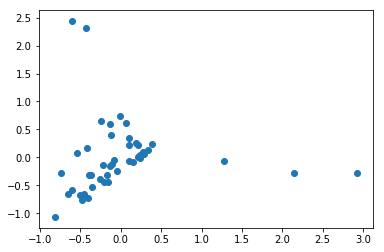

In [15]:
# si ploteamos las primeras dos componentes estamos explicando en total el 37% (19%+18%) de la varianza en los datos
plt.scatter(X[:, 0], X[:, 1])
# si ploteáramos en 3d las tres primeras componentes, explicaríamos el 50% de la varianza de 
# unos datos 1909-dimensionales... en tan sólo 3 dimensiones!

## Proyectando con PCA

In [ ]:
# SPECTRAL CLASSIFICATION OF QUASARS IN THE SLOAN DIGITAL SKY SURVEY: EIGENSPECTRA, REDSHIFT, AND LUMINOSITY EFFECTS

In [16]:
# Hagamos un PCA con sólo tres componentes para entender mejor el problema
pca = PCA(3) 
pca.fit(dat) 
X = pca.transform(dat) 

In [32]:
# Aquí quedan los coeficientes con los que se reconstruye cada uno de los 47 espectros
print(X.shape) 
X[:5,] # sólo muestro los cinco primeros para no ocupar tanto espacio

(47, 3)


array([[-0.48318763, -0.76860135,  0.38190162],
       [ 0.23162265,  0.03681076, -0.55784368],
       [-0.4172129 ,  0.17028319,  0.33766236],
       [-0.24434837,  0.64585243,  0.15440768],
       [-0.50186819, -0.6713372 ,  0.31232488]])

In [34]:
X[0] # Aquí están los 3 coeficientes para reconstruir el primer espectro
# Es equivalente a los a_i en la Ec. 4 del paper
# el primer espectro se reconstruye haciendo una combinación lineal entre los tres "eigenespectros"
# y los coeficientes que le dan peso a cada "eigenespectro" son estos a_i

array([-0.48318763, -0.76860135,  0.38190162])

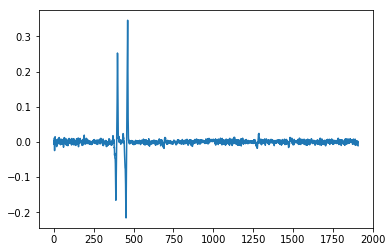

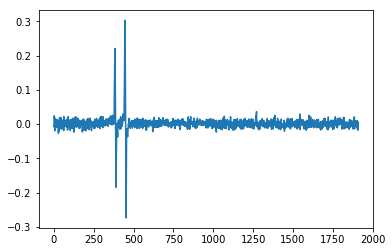

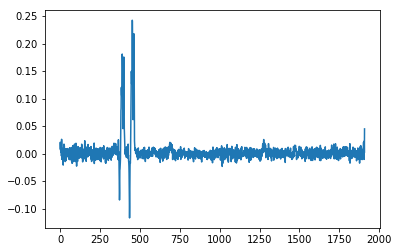

In [21]:
# Los "eigenespectros" e_i\lambda_k son los componentes del PCA
# son los mismos los eigenvectores de la matriz de covarianza
principalComponents=pca.components_
plt.plot(principalComponents[0])
plt.show()
plt.plot(principalComponents[1])
plt.show()
plt.plot(principalComponents[2])

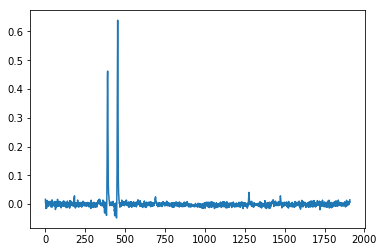

In [37]:
# Puedo reconstruir el primer espectro con la combinación lineal entre los coeficientes y los eigenespectros
# Hay que sumarle el "punto promedio" de los datos para que la proyección quede bien hecha 
# Eso pasa por lo que no regularizamos los datos antes de hacer el PCA
plt.plot(X[0,0]*pca.components_[0]+X[0,1]*pca.components_[1]+X[0,2]*pca.components_[2]+pca.mean_)


In [38]:
# se pueden reconstruir todos los datos de una vez haciendo una multiplicación matricial 
# entre X, la matriz de coeficientes y la matriz de eigenespectros (eigenvectores)
reconstructedData = np.dot(X, pca.components_)+pca.mean_

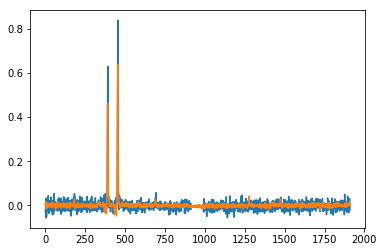

In [40]:
# la reconstrucción no es perfecta porque 3 componentes explican apenas el 50% de la varianza
plt.plot(dat[0])
plt.plot(reconstructedData[0])

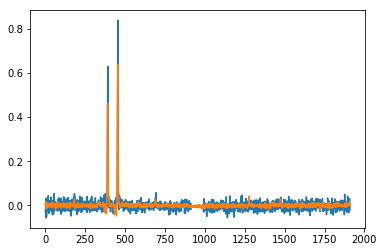

In [41]:
# Otra manera de hacer la reconstrucción es a través de esta función de sklearn:
inverseTransformedData = pca.inverse_transform(X)
plt.plot(dat[0])
plt.plot(inverseTransformedData[0])

In [50]:
# para ilustrar lo que hacen en el paper, voy a hacer PCA sobre un subconjunto de los datos (la mitad)
dat1=dat[:len(dat)//2]
dat2=dat[len(dat)//2:]
pca = PCA(3) 
pca.fit(dat1) # el PCA lo aplico al conjunto dat1
X1 = pca.transform(dat1)

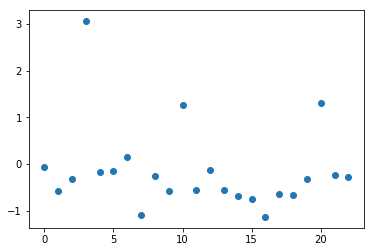

In [54]:
# ploteo la fracción entre el coeficiente que corresponde al segundo eigenespectro
# y el coeficiente que corresponde al primer eigenespectro
# esto es equivalente a los círculos negros en la fig 18 del paper
# en el eje x simplemente puse el orden en el que venían los espectros, 
# dado que no tenemos la información adicional que si tienen en el paper
# Lo que observo es que no hay ninguna tendencia, pues los espectros están organizados de manera aleatoria
plt.scatter(range(len(X1)),X1[:,1]/X1[:,0])

In [55]:
# Ahora obtengo los coeficientes para dat2, que serían los que necesito
# para hacer la proyección de los datos de dat2 sobre el espacio del PCA de dat1
X2 = pca.transform(dat2) 

(-2, 3)

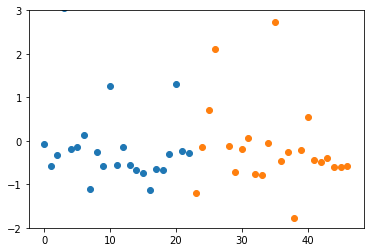

In [57]:
# ahora repito el último plot incluyendo la proyección de dat2
# los nuevos puntos (naranja) son equivalentes a los cuadrados blancos en la fig 18 del paper
plt.scatter(range(len(X1)),X1[:,1]/X1[:,0])
plt.scatter(range(len(X1),len(dat)),X2[:,1]/X2[:,0])
# hay un outlier raro entonces recorto un poco el plot
plt.ylim(-2,3)
# en el plot se observa que no hay ninguna tendencia, pues los espectros están organizados de manera aleatoria
# si los estuviera separando a través de una clasificación adicional (en el paper es con z y M)
# tal vez se vería una tendencia. Para YSOs tal vez se podría hacer con la edad, o tal vez la masa estelar
# o tal vez con alguna magnitud adicional. Lo que se busca es que si el segundo
# componente rastrea física distinta al primero, en principio debería depender de alguna
# circunstancia externa. En el caso de los cuásares, rastrea la evolución de la host-galaxy (si no estoy mal)